In [1]:
import os
path='C:/Users/Anirudh Kalla/Desktop/3rd Year/Computational Linguistics/Assignments/Assignment 02'
os.chdir(path)

In [141]:
import re
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter 
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
frequency = {}
open_file = open('brown-corpus.txt', 'r', encoding = "utf8")
file_to_string = open_file.read()
file_to_string = file_to_string.lower()
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', file_to_string)
token_ = 0
type_ = 0
x = []
y = []
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1
    token_=token_+1
     
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    type_=type_+1
    #print (type_, key, value)
    x.append(type_)
    y.append(value)
    #plt.plot(y, x) 
#plt.xlabel('Rank') 
#plt.ylabel('Frequency') 
#plt.title('Zipf Law') 
#plt.show() 
ttr = type_/token_
ttr_inverse = 1/ttr
pearson_corr_coeff = pearsonr(x, y)
print('TTR is', ttr)
print('TTR inverse is',ttr_inverse)
print('Pearson Correlation Coefficient', pearson_corr_coeff)

TTR is 0.045684285368354345
TTR inverse is 21.889365061463856
Pearson Correlation Coefficient (-0.07626110199933203, 6.649291632000963e-47)


<Figure size 640x480 with 0 Axes>

In [142]:
    import pandas as pd


    lst = [] 
    unigrams = {}
    bigrams = {} 
    uni=[]
    bi=[]
    text = open('brown-corpus.txt', 'r').read()
    lst = text.strip().split()
    print('Read ', len(lst), ' tokens')

    del text


    for l in lst:
        if not l in unigrams:
            unigrams[l] = 1
        else:
            unigrams[l] += 1
            uni.append(l)
    vocabulary=len(unigrams)        

    print('Generated ', len(unigrams), ' unigrams')  

    for i in range(len(lst) - 1):
        temp = (lst[i], lst[i+1]) 
        if not temp in bigrams:
            bigrams[temp] = 1
        else:
            bigrams[temp] += 1
            bi.append(temp)

    print('Generated ', len(bigrams), ' bigrams')


    total_corpus = sum(unigrams.values())

    #print('Bigram' + '\t' '\t'+ 'Bigram Count' + '\t' '\t'+ 'Uni Count' + '\t' '\t'+ 'Bigram Prob' + '\n')

    w=[]
    x=[]
    y=[]
    for k,v in bigrams.items():
        # first_word = helle in ('hello', 'world')
        first_word = k[0]
        first_word_count = unigrams[first_word]
        bi_prob = bigrams[k] / unigrams[first_word]
        bi_prob_laplace= (bigrams[k]+1) / (unigrams[first_word]+vocabulary)
        x.append(bi_prob)
        y.append(bi_prob_laplace)
        uni_prob = unigrams[first_word] / total_corpus
        w.append(uni_prob)
        final_prob = bi_prob + uni_prob
        #print(k[0] +'\t'+ k[1] +'\t'+'\t' + str(v) + '\t'+ '\t'+ str(first_word_count) + '\t'+ '\t'+'\t'+ str(bi_prob))

Read  1014940  tokens
Generated  100236  unigrams
Generated  539927  bigrams


In [143]:
import matplotlib.pyplot as plt
from numpy import random
import seaborn as sns
import numpy as np
x_arr=np.array(x)
#plt.hist(x_arr)
#sns.distplot(random.chisquare(df=1, size=10), hist=True)
#sns.distplot(lognorm.pdf(2.1,0.25), color='black', hist=True)
#plt.show()

In [144]:
y_arr=np.array(y)
#plt.hist(y_arr)

In [145]:
print(vocabulary)

100236


In [146]:
unique_w = set(w)
largest_w = max(unique_w)
unique_w.remove(largest_w)
second_largest_w = max(unique_w) 
print(largest_w)
print(second_largest_w)

0.061511025282282694
0.035368593217333044


In [147]:
indices1 = [i for i,x in enumerate(w) if x == 0.061511025282282694]
indices2 = [i for i,x in enumerate(w) if x == 0.035368593217333044]
print(uni[indices1[0]])
print(uni[indices2[0]])

jury
of


In [148]:
import statistics 
from statistics import mode 
mode(bi)

('of', 'the')

In [149]:
unseen_bigram_prob=1/vocabulary
print(unseen_bigram_prob)

9.976455564866915e-06


In [150]:
    lst_test = [] 
    unigrams_test = {}
    bigrams_test = {} 
    uni_test=[]
    bi_test=[]
    text_test="<s> peter piper picked a pickled pepper </s>"
    lst_test = text_test.strip().split()
    print('Read ', len(lst_test), ' tokens')
    del text_test
    for l in lst_test:
        if not l in unigrams_test:
            unigrams_test[l] = 1
        else:
            unigrams_test[l] += 1
            uni_test.append(l)
    vocabulary=len(unigrams_test)        
    print('Generated ', len(unigrams_test), ' unigrams')  
    
    for i in range(len(lst_test) - 1):
        temp = (lst_test[i], lst_test[i+1]) 
        if not temp in bigrams_test:
            bigrams_test[temp] = 1
        else:
            bigrams_test[temp] += 1
            bi_test.append(temp)
    print(unigrams_test)
    test_prob=1
    print('Generated ', len(bigrams_test), ' bigrams') 
    print(bigrams_test)
    u_test=list(unigrams.keys())
    b_test=list(bigrams.keys())
    for i in range(len(b_test)):
        if b_test[i] in bigrams.keys():
            test_prob=test_prob*bi_prob
    print(test_prob)

Read  8  tokens
Generated  8  unigrams
{'<s>': 1, 'peter': 1, 'piper': 1, 'picked': 1, 'a': 1, 'pickled': 1, 'pepper': 1, '</s>': 1}
Generated  7  bigrams
{('<s>', 'peter'): 1, ('peter', 'piper'): 1, ('piper', 'picked'): 1, ('picked', 'a'): 1, ('a', 'pickled'): 1, ('pickled', 'pepper'): 1, ('pepper', '</s>'): 1}
0.0


In [151]:
    lst_test = [] 
    unigrams_test = {}
    bigrams_test = {} 
    uni_test=[]
    bi_test=[]
    text_test="<s> peter piper picked a pickled pepper </s>"
    lst_test = text_test.strip().split()
    print('Read ', len(lst_test), ' tokens')
    del text_test
    for l in lst_test:
        if not l in unigrams_test:
            unigrams_test[l] = 1
        else:
            unigrams_test[l] += 1
            uni_test.append(l)
    vocabulary=len(unigrams_test)        
    print('Generated ', len(unigrams_test), ' unigrams')  
    
    for i in range(len(lst_test) - 1):
        temp = (lst_test[i], lst_test[i+1]) 
        if not temp in bigrams_test:
            bigrams_test[temp] = 1
        else:
            bigrams_test[temp] += 1
            bi_test.append(temp)
    print(unigrams_test)
    test_prob=1
    print('Generated ', len(bigrams_test), ' bigrams') 
    print(bigrams_test)
    u_test=list(unigrams.keys())
    b_test=list(bigrams_test.keys())
    for i in range(len(b_test)):
        if b_test[i] in bigrams.keys():
            test_prob=test_prob*bi_prob_laplace
        else:
            test_prob=test_prob*unseen_bigram_prob
            print('N')
    print("{:.50f}".format(test_prob))

Read  8  tokens
Generated  8  unigrams
{'<s>': 1, 'peter': 1, 'piper': 1, 'picked': 1, 'a': 1, 'pickled': 1, 'pepper': 1, '</s>': 1}
Generated  7  bigrams
{('<s>', 'peter'): 1, ('peter', 'piper'): 1, ('piper', 'picked'): 1, ('picked', 'a'): 1, ('a', 'pickled'): 1, ('pickled', 'pepper'): 1, ('pepper', '</s>'): 1}
N
N
N
N
N
N
0.00000000000000000000000000000000001795733085778058


In [5]:
import numpy as np
from scipy.stats import norm 
from scipy.stats import lognorm 
def compare_data_to_dist(x, mu_1=5, mu_2=7, sd_1=3, sd_2=3):
    ll_1 = 0
    ll_2 = 0
    ll_3 = 0
    ll_4 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
        ll_3 += np.log(random.chisquare(df=1))   
        ll_4 += np.log(lognorm.pdf(1,0.5))
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
    print("The LL of of x for df = %d and size = %d is: %.4f" % (1, 10, ll_3))
    print("The LL of of x for lt = %d and rt = %d is: %.4f" % (5, 2, ll_4))

compare_data_to_dist(x)

The LL of of x for mu = 5 and sd = 3 is: -1787575.5307
The LL of of x for mu = 7 and sd = 3 is: -2485203.7530
The LL of of x for df = 1 and size = 10 is: -685598.1701
The LL of of x for lt = 5 and rt = 2 is: -121910.8477


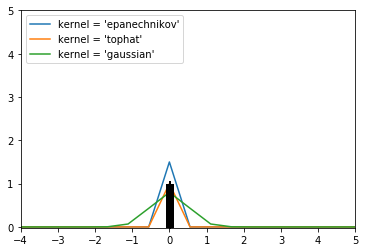

[5.75257616e-07 1.15986317e-03 6.39924507e-05 ... 3.71156214e-03
 3.71156214e-03 3.87630511e-07]


In [138]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity
import math
xn=np.array(x)
normalized_xn = xn / math.sqrt(max(sum(xn**2), 1e-12)) # L2: Matrix Norm

X_plot = np.linspace(-5, 5, 19)[:, np.newaxis]

fig, ax = plt.subplots()
#ax.fill(X_plot[:], normalized_xn, fc='black', alpha=0.5, label='input distribution')

for kernel in ['epanechnikov', 'tophat', 'gaussian']:
    kde = KernelDensity(kernel=kernel, bandwidth=0.5).fit(normalized_xn.reshape(-1,1))
    log_dens = kde.score_samples(X_plot)
    ax.plot(X_plot[:, 0], np.exp(log_dens), '-',
            label="kernel = '{0}'".format(kernel)) #To model the bimodal distribution of bigram probability data


ax.legend(loc='upper left')
ax.plot(normalized_xn[:], np.random.random(normalized_xn.shape[0]), '+k')

ax.set_xlim(-4, 5)
ax.set_ylim(-0.02, 5)
plt.show()
print(normalized_xn)